using data https://physionet.org/content/sleep-accel/1.0.0/heart_rate/

In [1]:
%pip install numpy pandas matplotlib 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime


In [30]:
data = pd.DataFrame({
    2: [57, 59, 57, 59, 57, 59, 57, 59],
    4: [54, 87, 54, 67, 54, 77, 54, 97],
    6: [150, 152, 150, 152, 150, 152, 150, 152]
})

print(data.head())

num_samples = 1000
synthetic_two = np.random.normal(data[2].mean(), data[2].std(), num_samples)
synthetic_four = np.random.normal(data[4].mean(), data[4].std(), num_samples)
synthetic_six = np.random.normal(data[6].mean(), data[6].std(), num_samples)


synthetic_data = pd.DataFrame({
    2: synthetic_two,
    4: synthetic_four,
    6: synthetic_six
})

print(synthetic_data.head())


    2   4    6
0  57  54  150
1  59  87  152
2  57  54  150
3  59  67  152
4  57  54  150
           2          4           6
0  58.195546  70.587374  150.163420
1  57.627387  97.562190  150.944499
2  57.605791  66.619120  149.768284
3  59.045829  76.483731  152.818268
4  61.497426  74.915604  150.184029


Each line in this file has the format: date (in seconds since PSG start), heart rate (bpm)
* ~ 22:00 started to sleep


         timestamp  hr  day         time
0    -556410.36066  57    7  41189.63934
1    -556408.36062  56    7  41191.63938
2    -556403.36062  56    7  41196.63938
3    -556399.36062  57    7  41200.63938
4    -556389.36062  59    7  41210.63938
...            ...  ..  ...          ...
4873   16959.47229  72    0   9759.47229
4874   16964.47229  74    0   9764.47229
4875   16970.47229  75    0   9770.47229
4876   16975.47229  76    0   9775.47229
4877   16980.47229  75    0   9780.47229

[4878 rows x 4 columns]


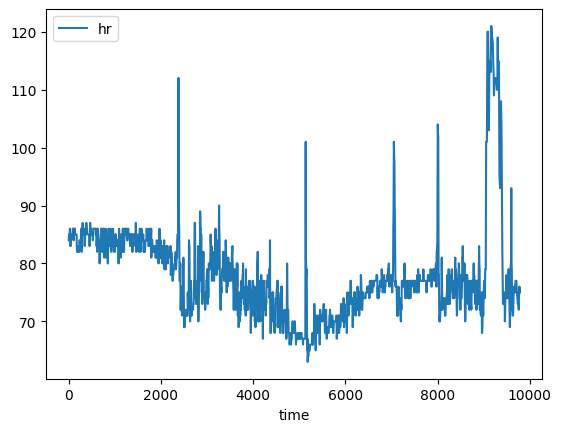

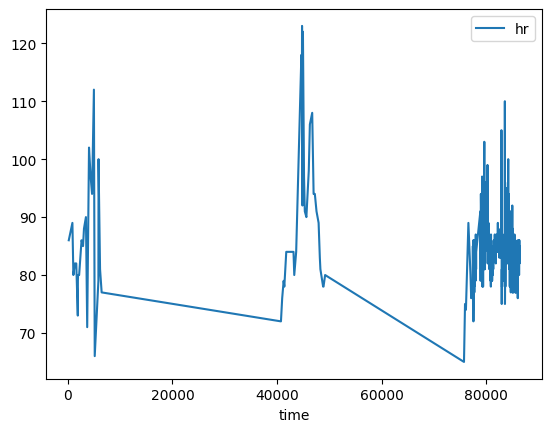

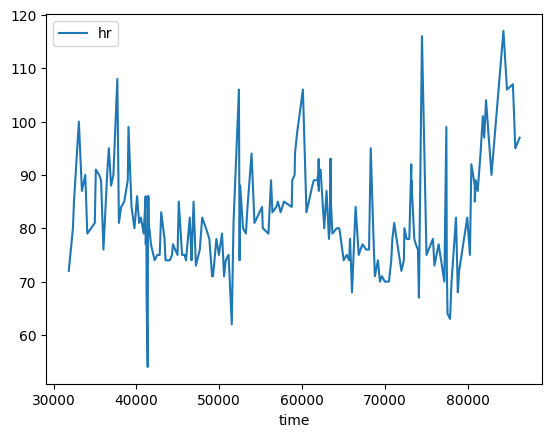

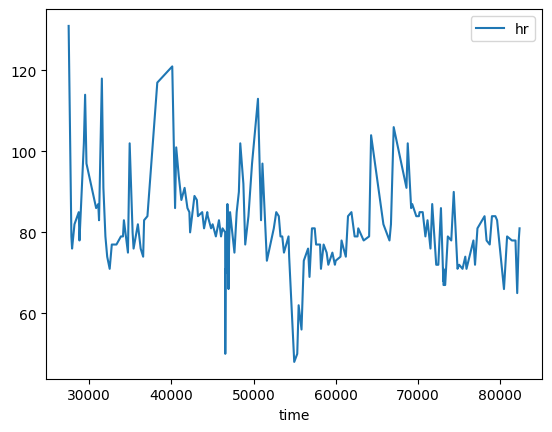

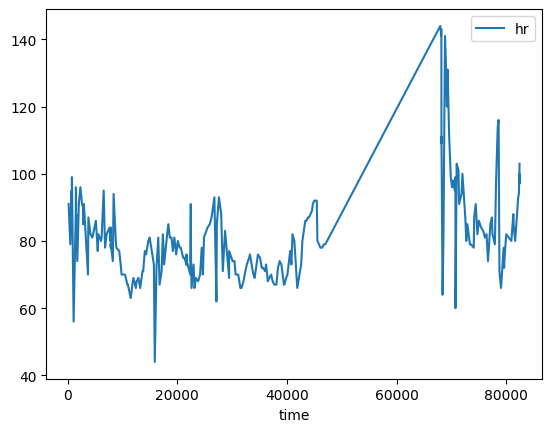

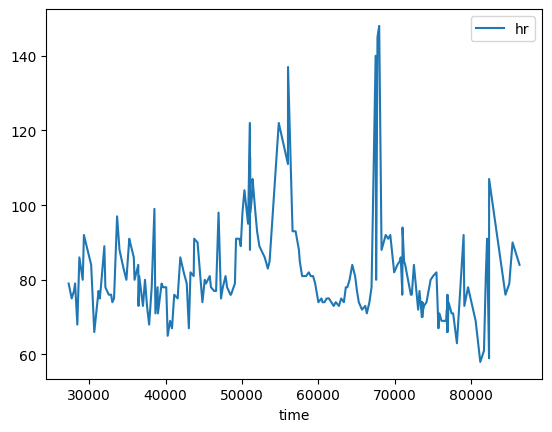

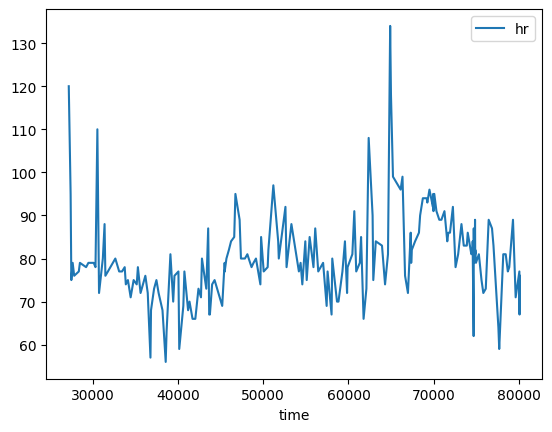

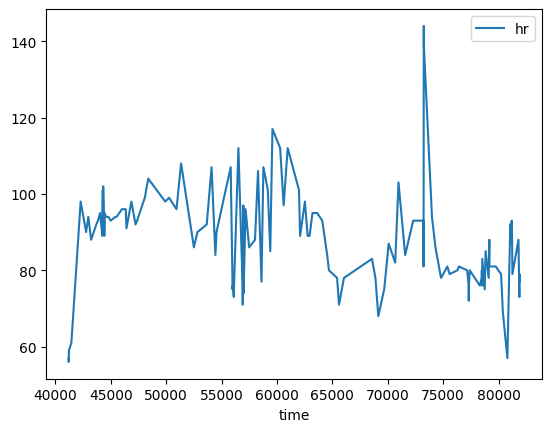

In [ ]:
df = pd.read_csv('./data/46343_heartrate.csv')

begin_date = datetime.strptime("1.1.24", "%d.%m.%y")
end_date = datetime.strptime("3.1.24", "%d.%m.%y")

start_sleep = 22
start_unix = datetime(1970, 1, 1)

def computeDay(ts):
    time_object = begin_date + timedelta(hours=start_sleep) + timedelta(seconds=ts)
    diff_day = end_date - time_object
    return diff_day.days

def computeTime(ts):
    time_object = begin_date + timedelta(hours=start_sleep) + timedelta(seconds=ts)
    midnight = time_object.replace(hour=0, minute=0, second=0, microsecond=0)
    #return (time_object - midnight).total_seconds()
    return time_object.time()

df['day'] = df['timestamp'].map(computeDay)
df['time'] = df['timestamp'].map(computeTime)

for i in range(8):
    d = df[df['day'] == i]
    d.plot.line(x='time', y='hr')

print(df)

In [ ]:
seconds = 556410
seconds = 16980
#seconds = 1

begin_date = datetime.strptime("1.1.24", "%d.%m.%y")
end_date = datetime.strptime("3.1.24", "%d.%m.%y")
time_object = begin_date + timedelta(hours=22) + timedelta(seconds=seconds)

diff_day = end_date - time_object

time_result = time_object.time()
midnight = time_object.replace(hour=0, minute=0, second=0, microsecond=0)

print((time_object - midnight).total_seconds())
print(time_object.timestamp())
print(time_object) 
print(diff_day.days) 

9780.0
1704159780.0
2024-01-02 02:43:00
0
